<a href="https://colab.research.google.com/github/Oumayma-O/DeepLearningTp1/blob/main/Deep_learning_Tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

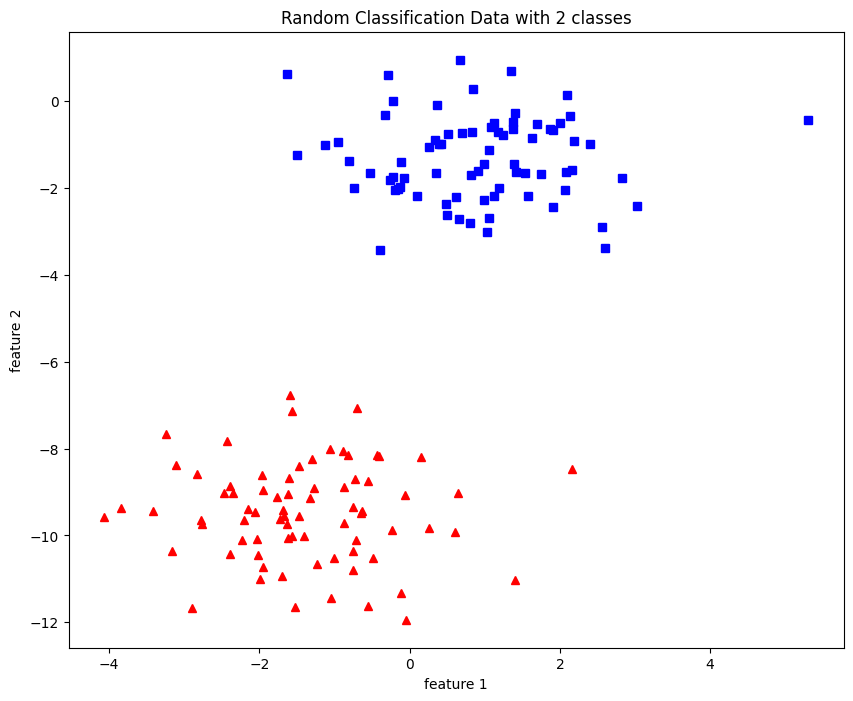

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs (n_samples=150, n_features=2,
 centers=2, cluster_std=1.05,
random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def heaviside(x):
    return 1 if x > 0 else 0

In [ ]:
x_values = [-2, -1, 0, 1, 2]
for x in x_values:
    print(f"Heaviside({x}) = {heaviside(x)}")

Heaviside(-2) = 0
Heaviside(-1) = 0
Heaviside(0) = 0
Heaviside(1) = 1
Heaviside(2) = 1


In [ ]:
import numpy as np

def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1, 1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            # Calculating prediction/hypothesis.
            y_hat = heaviside(np.dot(x_i.T, w))

            # Update weights if the example is misclassified.
            if  y[idx] - np.squeeze(y_hat) != 0:
                # Incrementing by 1.
                n_miss += 1
                # Update weights
                w = w + lr * ( y[idx] - np.squeeze(y_hat)) * x_i
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list


In [ ]:
print(f"w , n_miss_list",perceptron(X,y,0.01,3))

w , n_miss_list (array([[0.1       ],
       [0.01488595],
       [0.01693843]]), [14, 0, 0])


In [ ]:
# Plotting the decision boundary
def plot_decision_boundary(X, w):
    # Extracting weights
    w0, w1, w2 = w[0], w[1], w[2]

    # Calculate slope (m) and intercept (c) of the decision boundary line
    m = -w1 / w2  # slope
    c = -w0 / w2  # intercept

    # Generating x values to plot the decision boundary line
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x1 = np.array([x1_min, x1_max])
    x2 = m * x1 + c

    # Plotting the decision boundary
    plt.plot(x1, x2, color='k', linestyle='-', label='Decision Boundary')
    plt.xlim
    plt.ylim


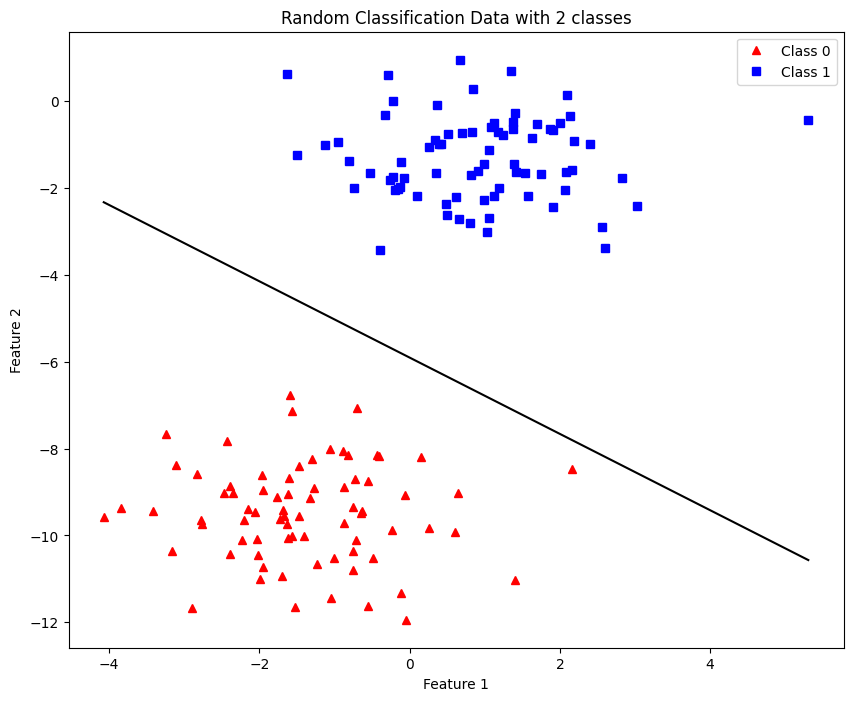

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


# Train the perceptron model
w, _ = perceptron(X, y, lr=0.01, epochs=3)

# Plotting
fig = plt.figure(figsize=(10, 8))



# Plotting the data points
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Random Classification Data with 2 classes')
plt.legend()

# Call the function to plot the decision boundary
plot_decision_boundary(X, w)

plt.show()


Shape of X: (250, 2)
Shape of y: (250,)
Generated Data:
X[0]: [ 0.67095062 -0.11035089], y[0]: 0
X[1]: [0.63005714 0.43941852], y[1]: 0
X[2]: [-0.64582979 -0.22424702], y[2]: -1
X[3]: [-1.13188108 -0.15142386], y[3]: -1
X[4]: [ 1.09562256 -0.23752258], y[4]: 0
X[5]: [-0.99437976  0.24155562], y[5]: -1
X[6]: [-0.60741182  0.08296974], y[6]: -1
X[7]: [-1.16241473  0.06882701], y[7]: -1
X[8]: [-1.23394996  0.2605058 ], y[8]: -1
X[9]: [-0.79671526 -0.13563378], y[9]: -1
X[10]: [ 0.83675164 -0.10894278], y[10]: 0
X[11]: [-0.83002146  0.23332341], y[11]: -1
X[12]: [-0.85302716  0.11864729], y[12]: -1
X[13]: [-0.77207623  0.23569777], y[13]: -1
X[14]: [ 0.78903272 -0.39299701], y[14]: 0
X[15]: [1.14572581 0.12785857], y[15]: 0
X[16]: [-1.06206981  0.03882347], y[16]: -1
X[17]: [1.02589416 0.30907097], y[17]: 0
X[18]: [0.64946773 0.22098511], y[18]: 0
X[19]: [1.10877779 0.38922939], y[19]: 0
X[20]: [-0.42368004 -0.1852411 ], y[20]: -1
X[21]: [ 0.69166838 -0.36924143], y[21]: 0
X[22]: [1.174326

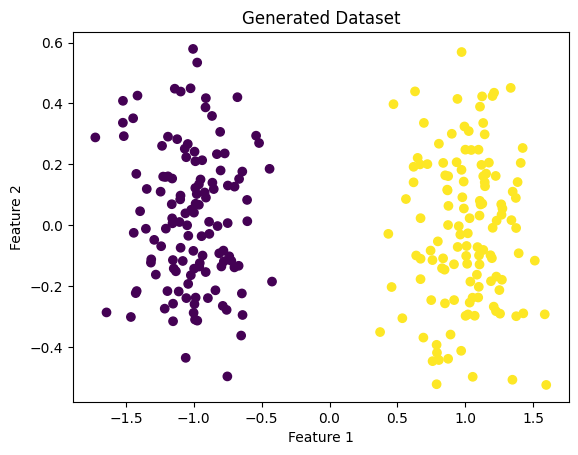

In [ ]:
import numpy as np

# Paramètres de la génération de données
n_samples_per_class = 125
n_features = 2
cluster_std = 0.25  # écart-type spécifié
random_state = 2

# Génération des données pour la classe yi = -1
mu1 = np.array([-1, 0])
X1 = np.random.normal(mu1, cluster_std, (n_samples_per_class, n_features))
y1 = np.full((n_samples_per_class,), -1)

# Génération des données pour la classe yi = 0
mu2 = np.array([1, 0])
X2 = np.random.normal(mu2, cluster_std, (n_samples_per_class, n_features))
y2 = np.full((n_samples_per_class,), 0)

# Fusionner les données et les étiquettes
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger les données
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


# Affichage des informations sur le dataset généré
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

import matplotlib.pyplot as plt

# Print the generated data
print("Generated Data:")
for i in range(len(X)):
    print(f"X[{i}]: {X[i]}, y[{i}]: {y[i]}")

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()



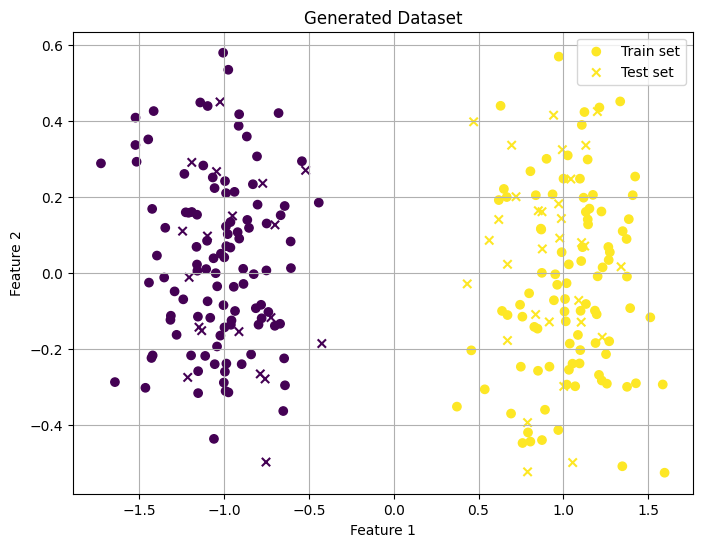

In [ ]:
from sklearn.model_selection import train_test_split


# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"w, miss_list",perceptron(X_train,y_train,0.01,10))

w, miss_list (array([[-11.92      ],
       [  9.06823565],
       [ -0.20631516]]), [118, 119, 119, 119, 120, 119, 120, 119, 120, 119])


In [ ]:
print(f"w, miss_list",perceptron(X_test,y_test,0.01,10))

w, miss_list (array([[-2.01      ],
       [ 1.61522577],
       [ 0.01124185]]), [21, 20, 20, 20, 20, 20, 20, 20, 20, 20])


Shape of X: (200, 2)
Shape of y: (200,)
Generated Data:
X[0]: [-0.06099216 -0.38011209], y[0]: -1
X[1]: [0.34307759 0.98268294], y[1]: 0
X[2]: [ 1.64825589 -0.44263429], y[2]: 0
X[3]: [-0.34505606 -0.73186727], y[3]: -1
X[4]: [-0.28990671  0.26545838], y[4]: -1
X[5]: [ 0.99723254 -0.01445689], y[5]: 0
X[6]: [ 0.48824038 -0.57354399], y[6]: 0
X[7]: [-1.70026706 -0.72684357], y[7]: -1
X[8]: [-0.59971084  0.82832803], y[8]: 0
X[9]: [-0.58405856  0.73816836], y[9]: -1
X[10]: [1.65746488 0.02635578], y[10]: 0
X[11]: [1.02698689 0.21250103], y[11]: 0
X[12]: [-1.4712116  -0.29804449], y[12]: -1
X[13]: [0.85848071 0.8900388 ], y[13]: 0
X[14]: [0.25175858 0.02770223], y[14]: 0
X[15]: [ 2.24653011 -0.65516986], y[15]: 0
X[16]: [1.39156891 0.25189071], y[16]: 0
X[17]: [0.76057184 0.41331289], y[17]: 0
X[18]: [-2.63029535 -0.0862439 ], y[18]: -1
X[19]: [ 1.76445235 -0.18570114], y[19]: 0
X[20]: [1.14566156 0.11854533], y[20]: 0
X[21]: [0.79790318 0.12182445], y[21]: 0
X[22]: [0.36825486 0.70245599

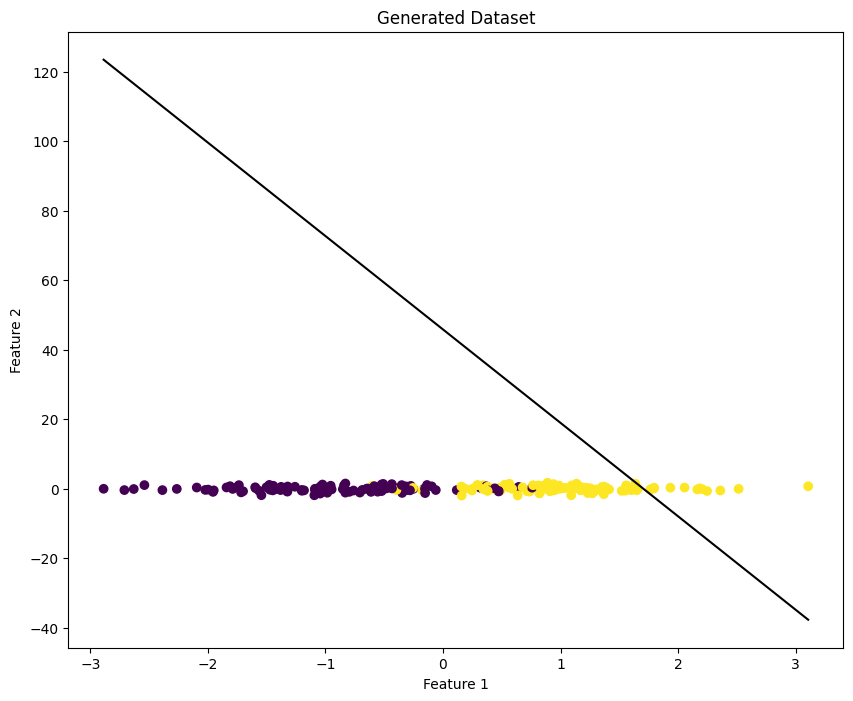

In [ ]:
# Train the perceptron model
w, _ = perceptron(X_train, y_train, lr=0.01, epochs=10)

# Plotting
fig = plt.figure(figsize=(10, 8))


# Affichage des informations sur le dataset généré
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

import matplotlib.pyplot as plt

# Print the generated data
print("Generated Data:")
for i in range(len(X_train)):
    print(f"X[{i}]: {X_train[i]}, y[{i}]: {y_train[i]}")

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
# Call the function to plot the decision boundary
plot_decision_boundary(X_train, w)
plt.show()





In [ ]:
# Créer une instance de Perceptron
perceptron_model = Perceptron()

# Entraîner le modèle sur les données d'entraînement
perceptron_model.train(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = perceptron_model.predict(X_test)

# Calculer la justesse (accuracy)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


NameError: name 'Perceptron' is not defined

Shape of X: (250, 2)
Shape of y: (250,)
Generated Data:
X[0]: [-1.38123395 -0.39051388], y[0]: -1
X[1]: [-0.49833072  0.24461749], y[1]: -1
X[2]: [0.76057184 0.41331289], y[2]: 0
X[3]: [ 0.33528965 -0.44521722], y[3]: 0
X[4]: [ 1.23201765 -1.25220251], y[4]: 0
X[5]: [ 2.24653011 -0.65516986], y[5]: 0
X[6]: [-0.59971084  0.82832803], y[6]: 0
X[7]: [1.18692984 0.16752422], y[7]: 0
X[8]: [-1.32340328 -0.71706597], y[8]: -1
X[9]: [-1.20137245 -0.35945843], y[9]: -1
X[10]: [-1.34961013 -0.78298086], y[10]: -1
X[11]: [-2.88646839 -0.01631343], y[11]: -1
X[12]: [1.65746488 0.02635578], y[12]: 0
X[13]: [-0.80047273  1.22319998], y[13]: -1
X[14]: [0.27707925 0.63795353], y[14]: -1
X[15]: [ 1.27139856 -1.31091897], y[15]: 0
X[16]: [-0.61211783 -0.90518112], y[16]: -1
X[17]: [ 1.30137126 -0.22162558], y[17]: 0
X[18]: [0.85848071 0.8900388 ], y[18]: 0
X[19]: [ 0.58881127 -0.01635837], y[19]: 0
X[20]: [1.24876733 0.40571783], y[20]: 0
X[21]: [ 1.33206614 -0.18294452], y[21]: 0
X[22]: [2.18367926 0.

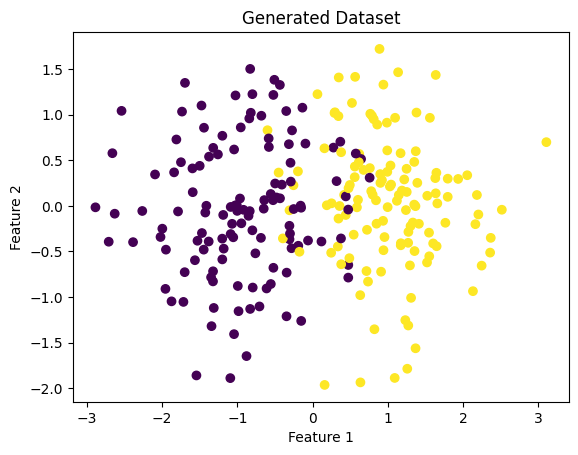

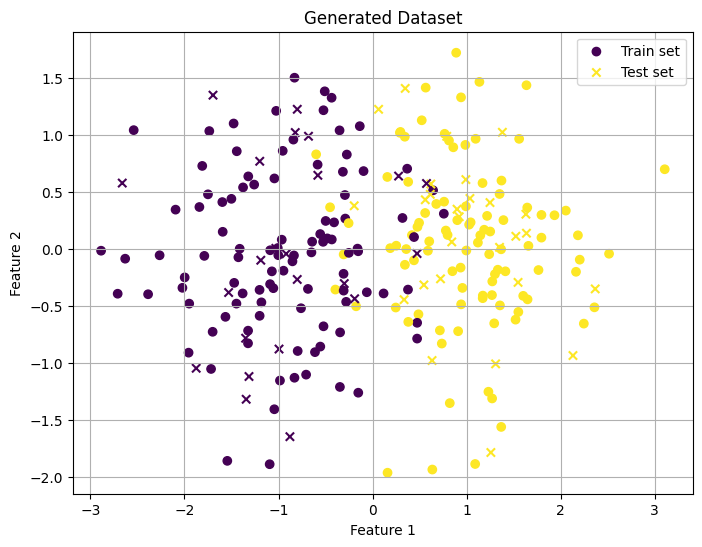

In [ ]:
import numpy as np

# Paramètres de la génération de données
n_samples_per_class = 125
n_features = 2
cluster_std = 0.75  # écart-type spécifié
random_state = 2

# Génération des données pour la classe yi = -1
mu1 = np.array([-1, 0])
X1 = np.random.normal(mu1, cluster_std, (n_samples_per_class, n_features))
y1 = np.full((n_samples_per_class,), -1)

# Génération des données pour la classe yi = 0
mu2 = np.array([1, 0])
X2 = np.random.normal(mu2, cluster_std, (n_samples_per_class, n_features))
y2 = np.full((n_samples_per_class,), 0)

# Fusionner les données et les étiquettes
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger les données
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


# Affichage des informations sur le dataset généré
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

import matplotlib.pyplot as plt

# Print the generated data
print("Generated Data:")
for i in range(len(X)):
    print(f"X[{i}]: {X[i]}, y[{i}]: {y[i]}")

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()


from sklearn.model_selection import train_test_split


# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()
